In [162]:
from standardInclude import *
enable_atlas_root()


Applying g-2 style settings...



In [163]:
f = { 
      13:r.TFile("./data/rocks/results_station_13.root"),
      18:r.TFile("./data/rocks/results_station_18.root"),
      'run2':r.TFile("/home/jlab/g-2/caloTrackMatching/data/run2/results_caloTrackMatching_TW_Run2c_partial.root")
    }

In [164]:
caloToPlot = 18
tlow = 10
thigh = 550
timeRebinFactor = 10
func1 = False
allFitResults = []

f[caloToPlot].ls()

TFile**		./data/rocks/results_station_18.root	
 TFile*		./data/rocks/results_station_18.root	
  KEY: TH2I	allClusterY_vs_Time;1	Cluster y [mm] vs. Time
  KEY: TH3I	allTracks_yCalo_vs_yBeam_vs_Time;1	Track y vs. Extrapolated Calo y vs. Time
  KEY: TH3I	matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time;1	Tracker Calo y vs. Cluster Calo y vs. Time
  KEY: TH3I	matchedTracks_yBeam_vs_Time;1	Tracker Calo y vs. Cluster Calo y vs. Time


In [165]:
def getWidths(h):
    '''
    Takes a TH2 of positions vs. time and returns a vector of time and standard deviations
    '''
    means = []
    widths = []
    times = []
    meanErrs = []
    widthErrs = []
    for bini in range(1,h.GetNbinsX()+1):
        hi = h.ProjectionY("", bini, bini)
        time = h.GetXaxis().GetBinCenter(bini)
        times.append(time)
        means.append(hi.GetMean(1))
        widths.append(hi.GetStdDev(1))
        meanErrs.append(hi.GetMean(11))
        widthErrs.append(hi.GetStdDev(11))

    dicti = {'times':times, 'widths':widths, 'widthErrs':widthErrs, 'means':means, 'meanErrs':meanErrs}
    #return(times, widths, widthErrs, means, meanErrs) 
    return dicti

In [166]:
if(False):
    func = r.TF1("func","pol1",tlow,thigh)
    paramVec = [1,1]
elif(True):
    func = r.TF1("func","[0] - [1]/(TMath::Exp([2]*x)) + [3]*(x)",tlow,thigh)
    func.SetParNames("C", "A", "#tau", "m")
    #func.SetParLimits(2,-10000000000,-0)
    paramVec = [1,10,1,-0.0001,10]
elif(False):
    func = r.TF1("func","[0] - [1]/(TMath::Exp([2]*(x + [4]))) + [3]*((x))",tlow,thigh)
    func.SetParNames("C", "A", " #tau", "m", "A_{2}")
    paramVec = [1,10,1,-0.0001,10,0.001]
elif(False):
    func = r.TF1("func","[0] - [1]/(TMath::Exp([2]*(x))) + [3]*((x)) + [4]*(x*x - [5])",tlow,thigh)
    paramVec = [1,10,1,-0.0001,10,0.001,-10]

---

### Now lets go through and fit the widths of the distributions from the 9-day dataset

In [167]:
allClusterY_vs_Time = f[caloToPlot].Get("allClusterY_vs_Time").Clone()
allClusterY_vs_Time.SetDirectory(0)
allClusterY_vs_Time.Rebin2D(timeRebinFactor,1)

<ROOT.TH2I object ("allClusterY_vs_Time") at 0x7fa128506780>

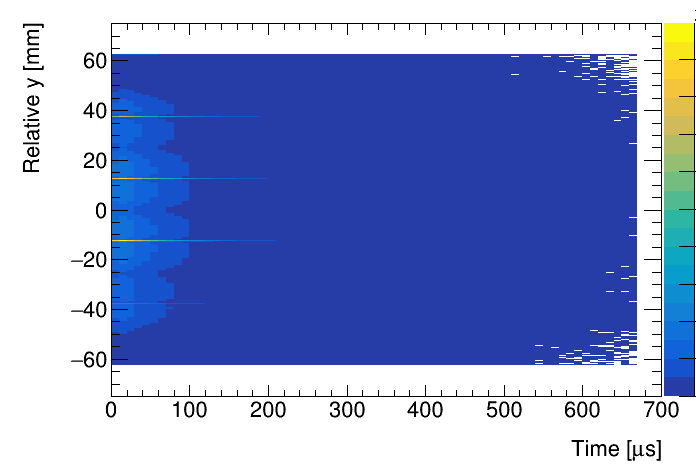

In [168]:
c = r.TCanvas()
allClusterY_vs_Time.Draw("colz")
c.Draw()

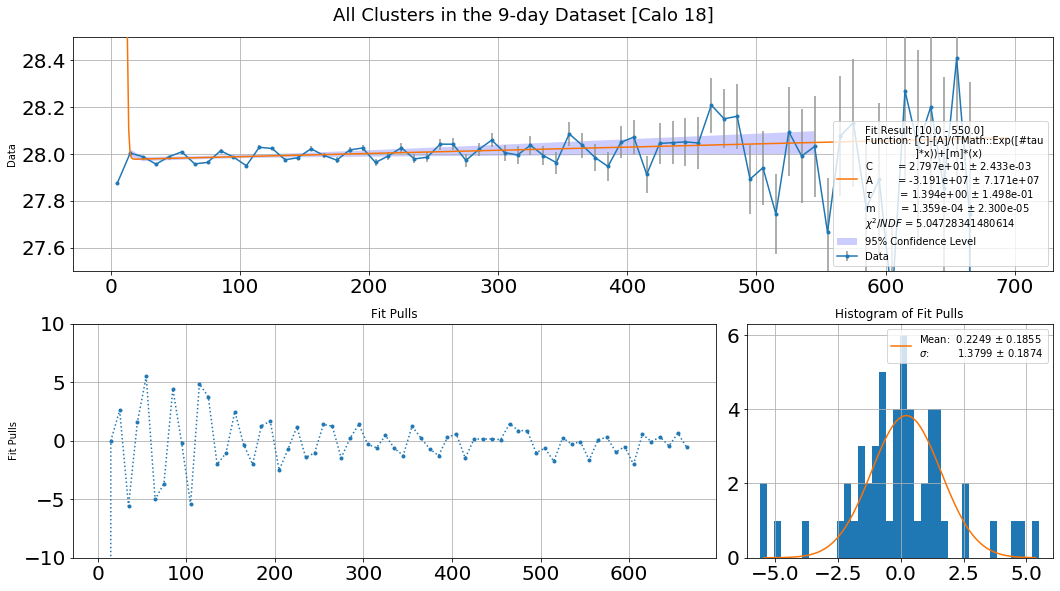

In [169]:
widthDict = getWidths(allClusterY_vs_Time)

for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
#fitresult = fitVector(times, means, func, None, meanErrs)
fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])

#fitresult = fitVector(times, widths, func, None, widthErrs)
allFitResults.append(fitresult)

fitresult.draw("All Clusters in the 9-day Dataset [Calo "+str(caloToPlot)+"]", yrange=[[27.5,28.5], [-10,10]])

plt.show()

Restricting range of FFT to: [10, 400]


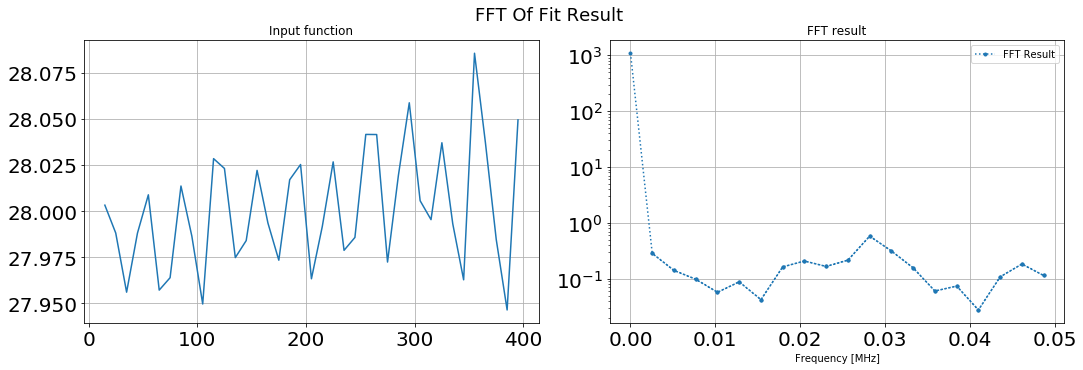

In [170]:
fitresult.fft([10,400], logy=True)
plt.show()

---

### And now lets compare what the entire tracker sees

---

In [171]:
allTracks_yCalo_vs_yBeam_vs_Time = f[caloToPlot].Get("allTracks_yCalo_vs_yBeam_vs_Time").Clone()
allTracks_yCalo_vs_yBeam_vs_Time.SetDirectory(0)
allTracks_yCalo_vs_yBeam_vs_Time.Rebin3D(timeRebinFactor,1,1)

<ROOT.TH3I object ("allTracks_yCalo_vs_yBeam_vs_Time") at 0x7fa12b520690>

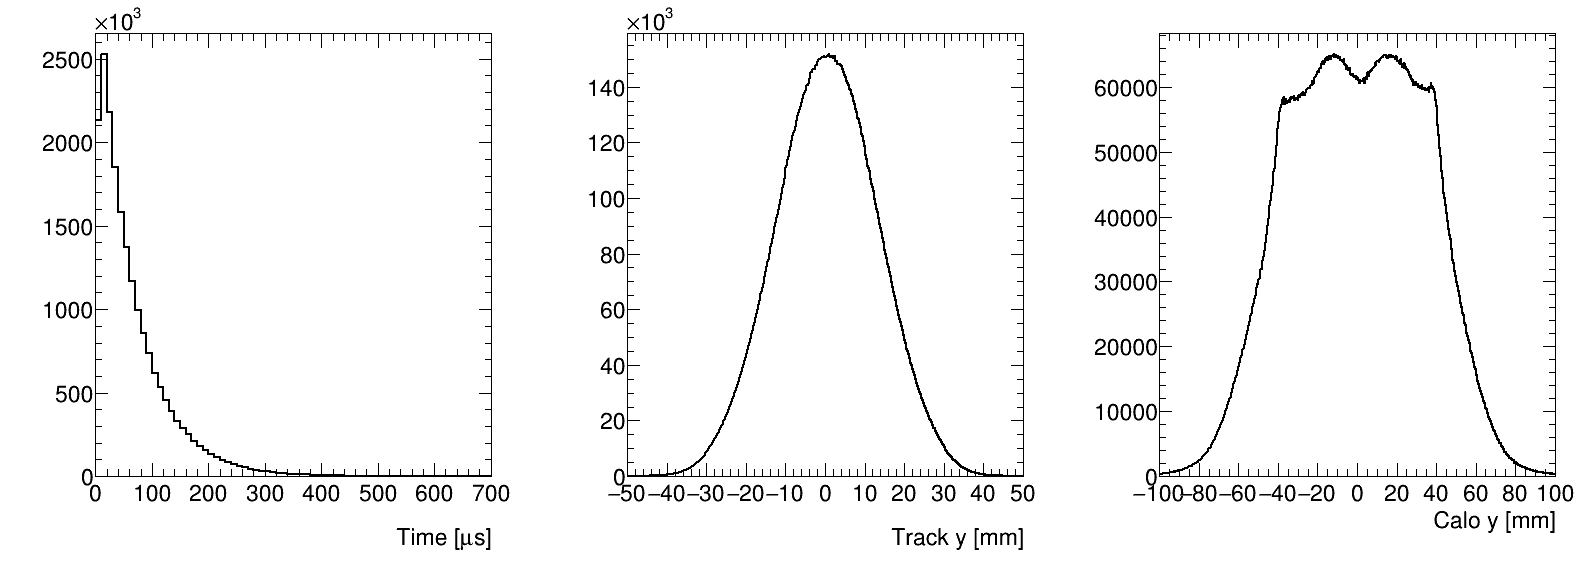

In [172]:
c = r.TCanvas("c","c",1600,600)
c.Divide(3,1)
for i, axi in enumerate(["x","y","z"]):
    c.cd(i+1)
    allTracks_yCalo_vs_yBeam_vs_Time.Project3D(axi).Draw()
c.Draw()

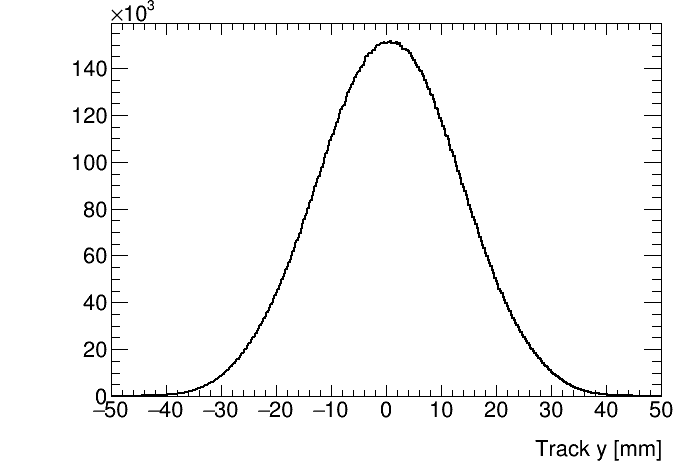

In [173]:
c = r.TCanvas()
allTracks_yCalo_vs_yBeam_vs_Time.Project3D("y").Draw("colz")
c.Draw()

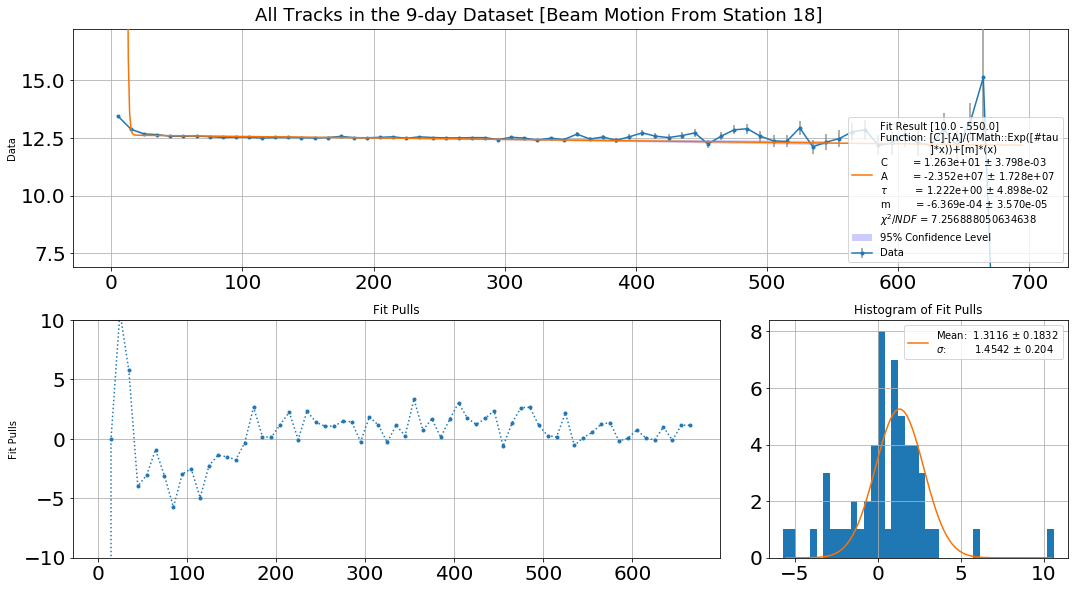

In [174]:
widthDict = getWidths(allTracks_yCalo_vs_yBeam_vs_Time.Project3D("yx"))

for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
#fitresult = fitVector(times, widths, func, None, widthErrs)
fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])

allFitResults.append(fitresult)


fig,ax = fitresult.draw("All Tracks in the 9-day Dataset [Beam Motion From Station "+str(caloToPlot)+"]", yrange=[None, [-10,10]])

plt.show()

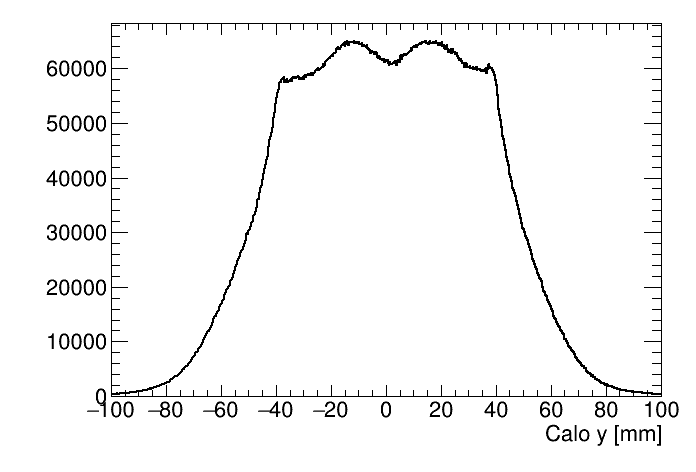

In [175]:
c = r.TCanvas()
allTracks_yCalo_vs_yBeam_vs_Time.Project3D("z").Draw("colz")
c.Draw()

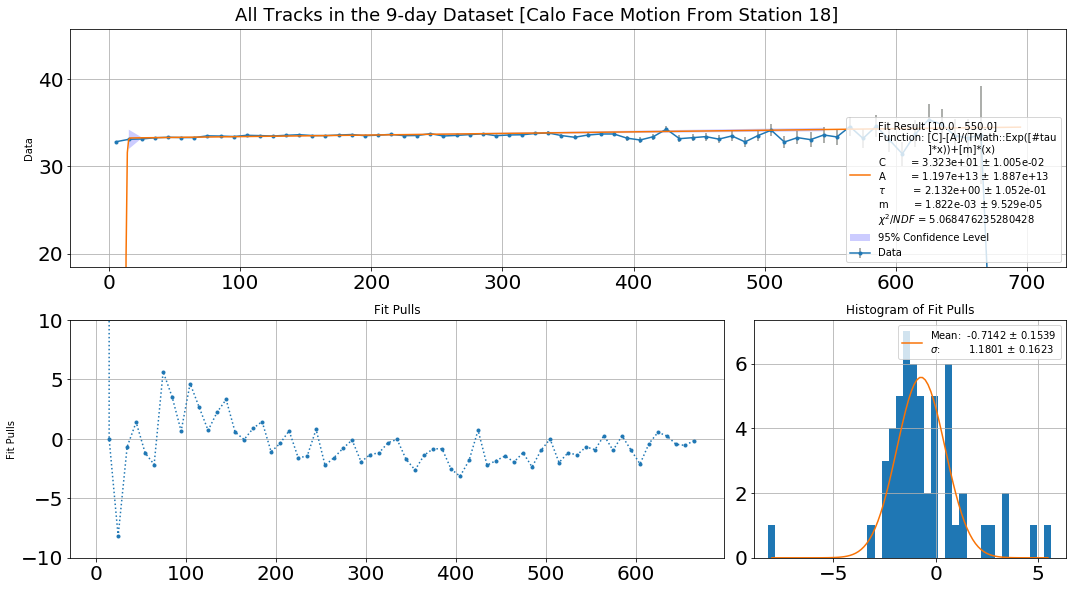

In [176]:
widthDict = getWidths(allTracks_yCalo_vs_yBeam_vs_Time.Project3D("zx"))

for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
#fitresult = fitVector(times, widths, func, None, widthErrs)
allFitResults.append(fitresult)

fig,ax = fitresult.draw("All Tracks in the 9-day Dataset [Calo Face Motion From Station "+str(caloToPlot)+"]", yrange=[None, [-10,10]])

plt.show()

---

### And now the matched tracks

---

In [177]:
#matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time = f[caloToPlot].Get("trackCalo/matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time").Clone()
matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time = f[caloToPlot].Get("matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time").Clone()
matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.SetDirectory(0)
matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.Rebin3D(timeRebinFactor,1,1)

<ROOT.TH3I object ("matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time") at 0x7fffebf01e80>

In [184]:
#matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time = f[caloToPlot].Get("trackCalo/matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time").Clone()
matchedTracks_yBeam_vs_Time = f[caloToPlot].Get("matchedTracks_yBeam_vs_Time").Clone()
matchedTracks_yBeam_vs_Time.SetDirectory(0)
matchedTracks_yBeam_vs_Time.Rebin3D(timeRebinFactor,1,1)

<ROOT.TH3I object ("matchedTracks_yBeam_vs_Time") at 0x7fa128646c10>

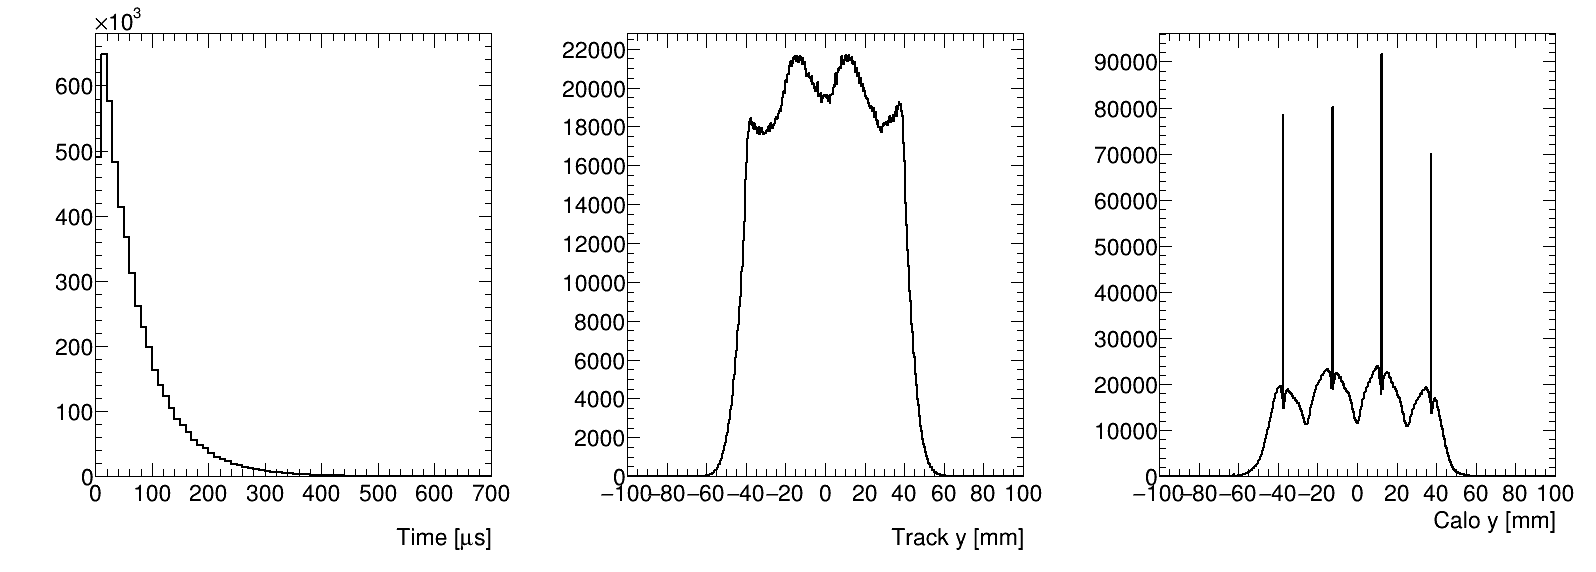

In [178]:
c = r.TCanvas("c","c",1600,600)
c.Divide(3,1)
for i, axi in enumerate(["x","y","z"]):
    c.cd(i+1)
    matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.Project3D(axi).Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


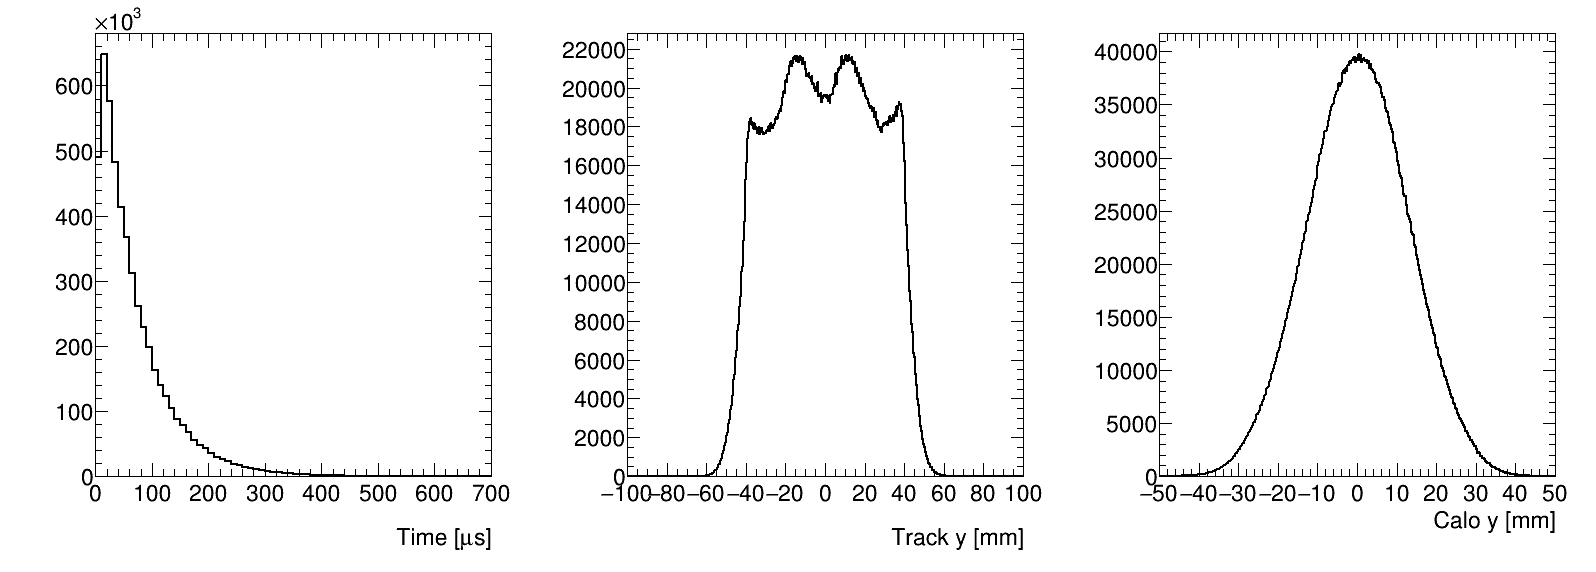

In [185]:
c = r.TCanvas("c","c",1600,600)
c.Divide(3,1)
for i, axi in enumerate(["x","y","z"]):
    c.cd(i+1)
    matchedTracks_yBeam_vs_Time.Project3D(axi).Draw()
c.Draw()

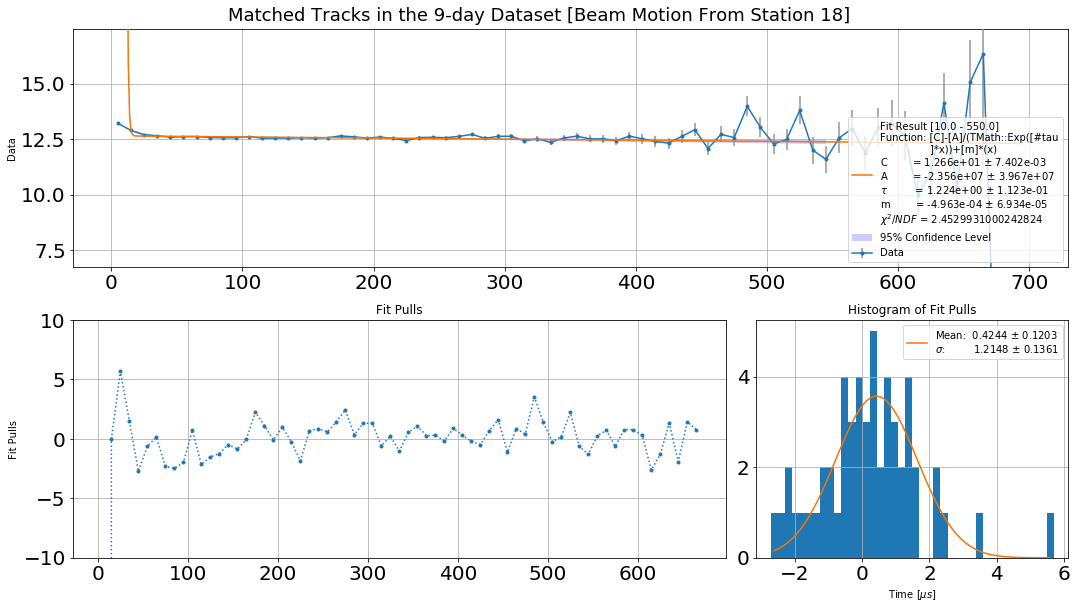

In [187]:
widthDict = getWidths(matchedTracks_yBeam_vs_Time.Project3D("zx"))

for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
allFitResults.append(fitresult)

fig,ax = fitresult.draw("Matched Tracks in the 9-day Dataset [Beam Motion From Station "+str(caloToPlot)+"]", yrange=[None, [-10,10]])
#ax[0].set_ylim(-2,2)
#ax[0].set_ylim(22,27)
plt.xlabel(r"Time [$\mu s$]")


plt.show()

### Widths

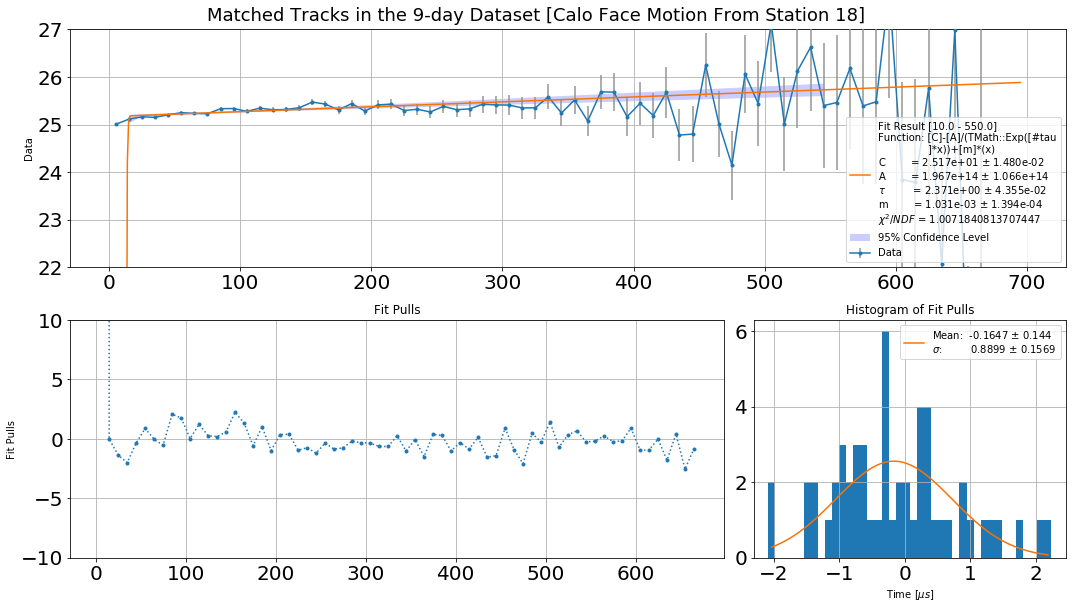

In [179]:
widthDict = getWidths(matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.Project3D("yx"))

for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
allFitResults.append(fitresult)

fig,ax = fitresult.draw("Matched Tracks in the 9-day Dataset [Calo Face Motion From Station "+str(caloToPlot)+"]", yrange=[None, [-10,10]])
#ax[0].set_ylim(-2,2)
ax[0].set_ylim(22,27)
plt.xlabel(r"Time [$\mu s$]")


plt.show()

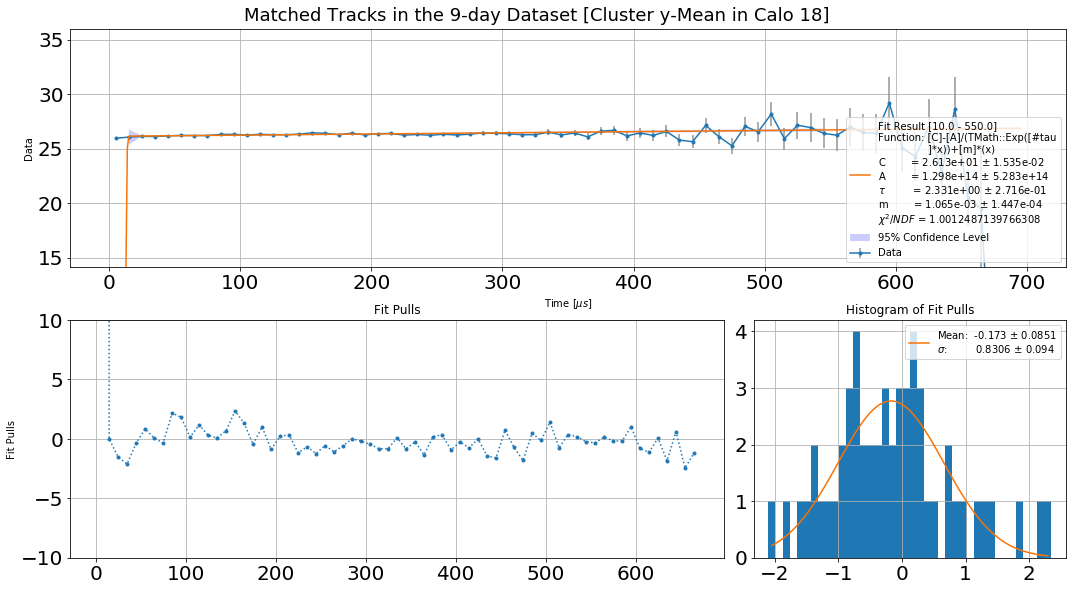

In [180]:
widthDict = getWidths(matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.Project3D("zx"))

for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
allFitResults.append(fitresult)

fig,ax = fitresult.draw("Matched Tracks in the 9-day Dataset [Cluster y-Mean in Calo "+str(caloToPlot)+"]", yrange=[None, [-10,10]])
ax[0].set_xlabel(r"Time [$\mu s$]")
#ax[0].set_ylim(-2.5,2)

plt.show()

In [181]:
print([x[1] for x in allFitResults])

[([27.97479741921898, -31909258.37732435, 1.394058712819313, 0.00013591904666865676], [0.0024327544886453634, 71708798.09100032, 0.14978925624684644, 2.299636580658837e-05]), ([12.62577539952513, -23521158.37123817, 1.2221469657299613, -0.0006369287929517059], [0.0037977195896676664, 17276442.936809056, 0.048975062268054585, 3.569547494906314e-05]), ([33.23116983991224, 11971629456330.45, 2.131828775845168, 0.0018216111395527527], [0.01005496505487579, 18874967708479.035, 0.10519702973806298, 9.529068625438907e-05]), ([25.167087482590873, 196686067159216.4, 2.370991292781467, 0.0010314875256595332], [0.014796676126128021, 106553655534675.7, 0.04355089530169373, 0.0001394461942867483]), ([26.131548447715677, 129817830360067.36, 2.3310220266863686, 0.0010651811531297393], [0.01534745453258764, 528333096066007.5, 0.2715664807148424, 0.00014467479018025322])]


4
[5.04728341480614, 7.256888050634638, 5.068476235280428, 1.0071840813707447, 1.0012487139766308]


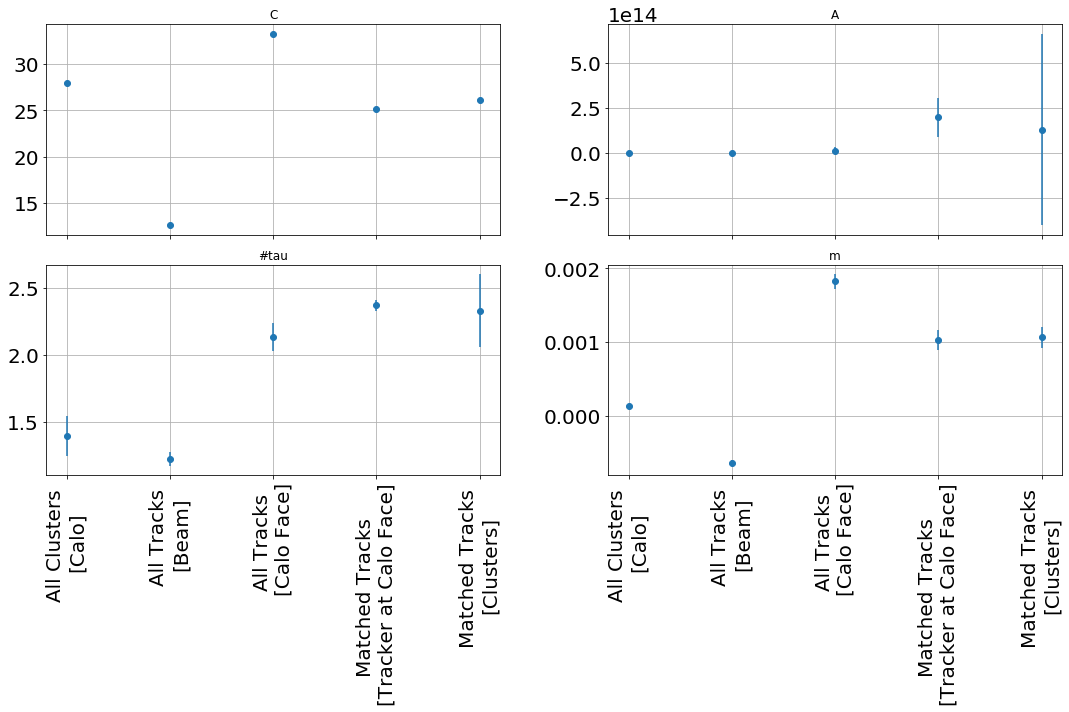

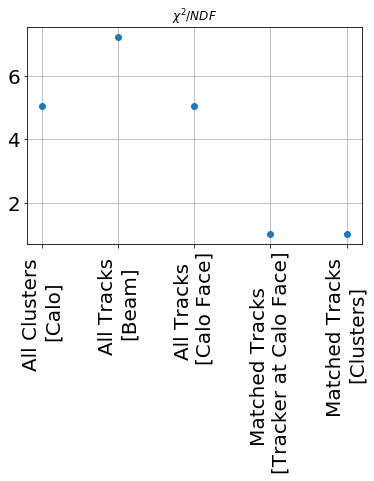

In [182]:
nPlots = len(allFitResults[0][1][0])
print(nPlots)

names = ["All Clusters \n[Calo]", "All Tracks \n[Beam]", 'All Tracks \n[Calo Face]', 
         'Matched Tracks \n[Tracker at Calo Face]', 'Matched Tracks \n[Clusters]']
parNames = ['p'+str(i) for i in range(nPlots)]
parNames = [func.GetParName(i) for i in range(nPlots)]

allPars, allParErrs = zip(*[x[1] for x in allFitResults])
allChiSquare = [x[2] for x in allFitResults]
print(allChiSquare)
parsByPar = zip(*allPars)
errsByPar = [x for x in zip(*allParErrs)]

fig,axs = plt.subplots(2,int((nPlots+1)/2), figsize=(15,10), sharex=True)
try:
    ax = flatten2dArray(axs)
except:
    ax = axs
for i,x in enumerate(parsByPar):
    axi = ax[i]
    axi.set_title(parNames[i])
    axi.errorbar([i for i in range(len(names))],x, yerr=errsByPar[i],fmt="o")
    axi.set_xticks([i for i in range(len(names))])
    axi.set_xticklabels(names,rotation=90)
    axi.grid()
    #axi.set_ylim(np.abs(x[0])*-5,np.abs(x[0])*5)
plt.tight_layout()
plt.show()


fig,ax = plt.subplots()
plt.plot(allChiSquare,"o")
plt.grid()
ax.set_xticks([i for i in range(len(names))])
ax.set_xticklabels(names,rotation=90)
plt.title(r"$\chi^{2} / NDF$")
plt.show()

### Means